In [1]:
from Results.utils_tables import *
import os 
import seaborn as sns

In [2]:
tuning_folder=os.path.join(os.getcwd(),"Tuning")


# Cleaning

In [4]:
def get_best_parameters(tuning_table,par_type): #Par_type can be "CROSSOVER" or "MUT"
    # #Make copy to work with
    # tuning_copy=tuning_table.copy()
    #Sorting and selecting 
    tuning_table=tuning_table.sort_values("Av_Best",ascending=False)
    best_cross_counts=tuning_table[par_type][:50].value_counts()
    return best_cross_counts.keys()




In [5]:
table_list=[table for table in os.listdir(tuning_folder) if "csv" in table]
print(table_list)
tuning_dict={}
for table in table_list:
    #open table
    tuning_table=pd.read_csv(os.path.join(tuning_folder,table))
    
    #Av_Best (1/Av)
    tuning_table["Av_Best"]=tuning_table["Av_Best"].apply(lambda x: 1/x)
    #Normalize cols
    metric_list=["Av_Best"]
    tuning_table=normalise_metrics(metric_list,tuning_table)

    # #Getting best_cross 
    best_cross=get_best_parameters(tuning_table,"CROSS")
    tuning_table=tuning_table[tuning_table["CROSS"].isin(best_cross)]
    #append
    tuning_dict[table]=tuning_table
    #clear
    del tuning_table



['Results_finetune_rondrit016.csv', 'Results_finetune_rondrit048.csv', 'Results_finetune_rondrit070.csv', 'Results_finetune_rondrit127.csv', 'Results_PR_CROSS_rondrit016.csv', 'Results_PR_CROSS_rondrit048.csv', 'Results_PR_CROSS_rondrit070.csv', 'Results_PR_CROSS_rondrit127.csv', 'Results_rondrit016.csv', 'Results_rondrit048.csv', 'Results_rondrit070.csv', 'Results_rondrit127.csv', 'Results_scal_rondrit016.csv', 'Results_scal_rondrit048.csv', 'Results_scal_rondrit070.csv', 'Results_scal_rondrit127.csv']


# Getting tables with only best Mut/Cross operator

In [6]:
#best hyperparameters
best_cross_op=["cross_sequential_constructive"]
best_mut=["mut_RSM"]

best_dict={}
for key in tuning_dict.keys():
    test_table=tuning_dict[key].copy()

    test_table=test_table[test_table["CROSS"].isin(best_cross_op)]
    test_table=test_table[test_table["MUT"].isin(best_mut)] 
    
    best_dict[key]=test_table
    
    del test_table
    


# Plotting (with tuning_dict)

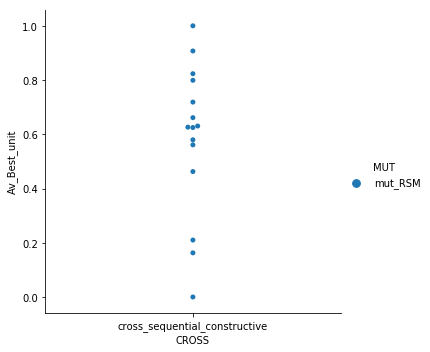

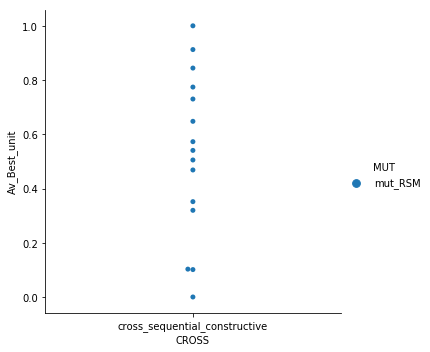

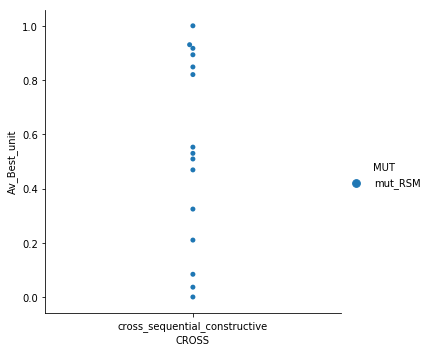

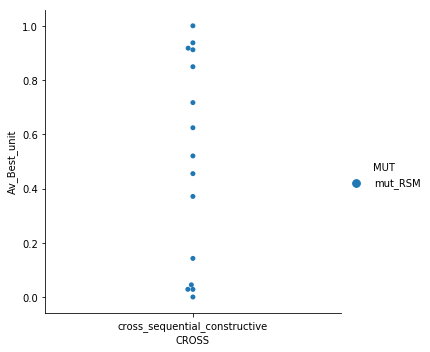

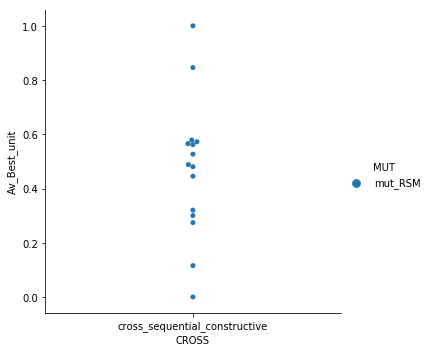

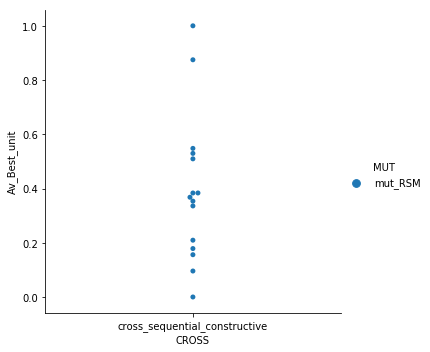

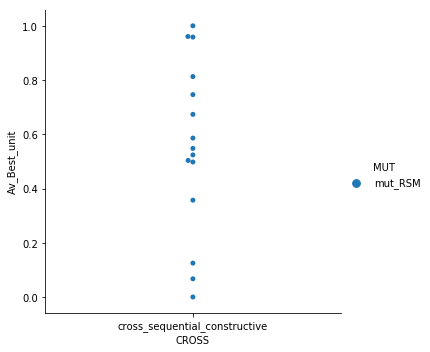

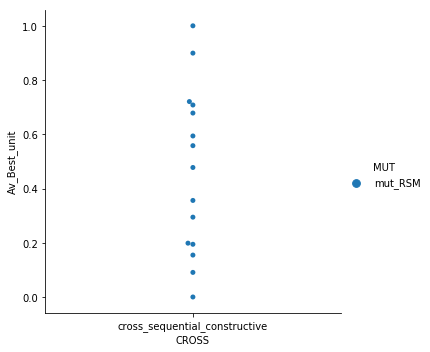

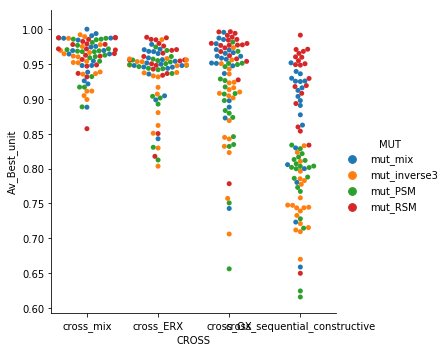

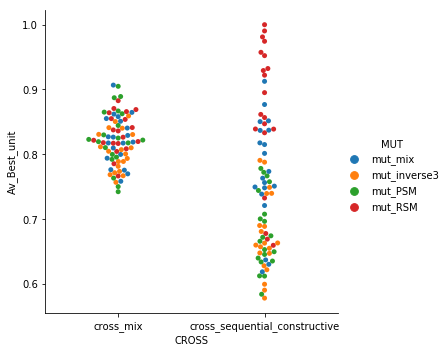

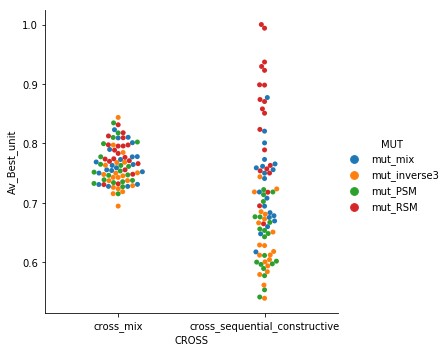

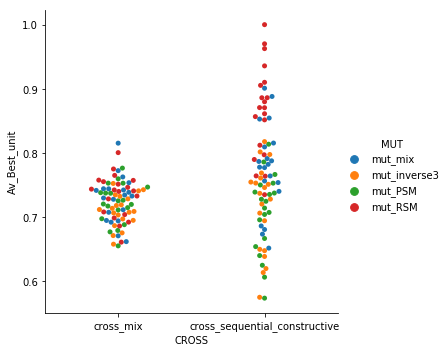

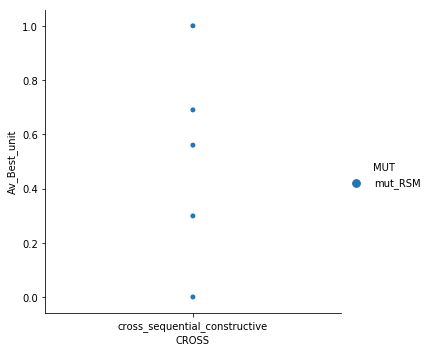

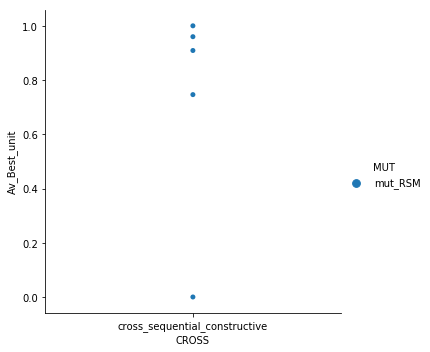

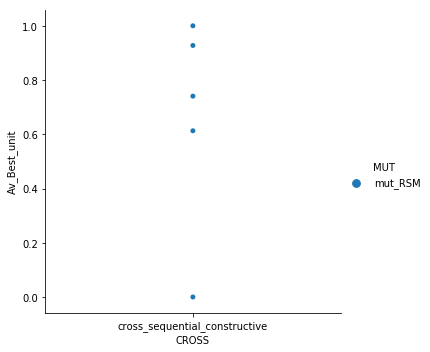

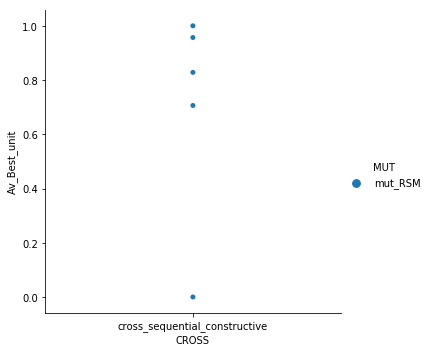

In [7]:
for key in tuning_dict.keys():
    sns.catplot(x="CROSS", y="Av_Best_unit",hue="MUT",kind="swarm", data=tuning_dict[key]);


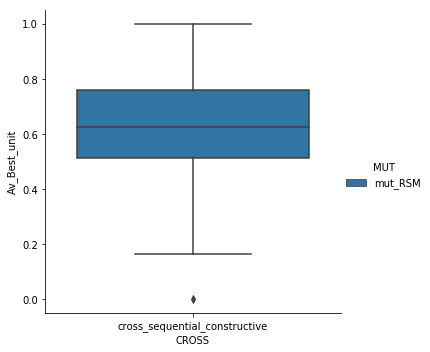

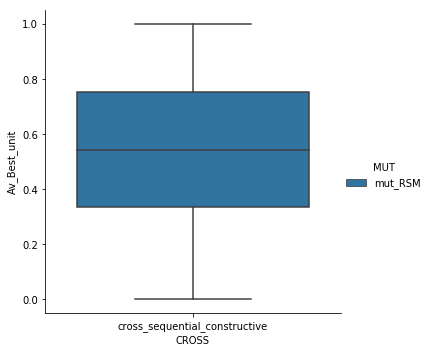

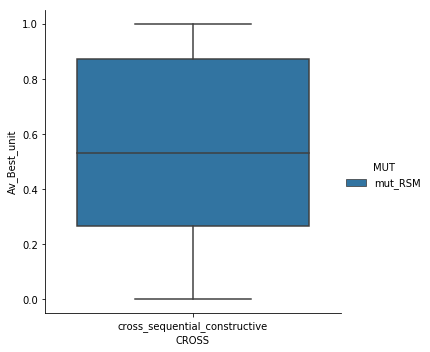

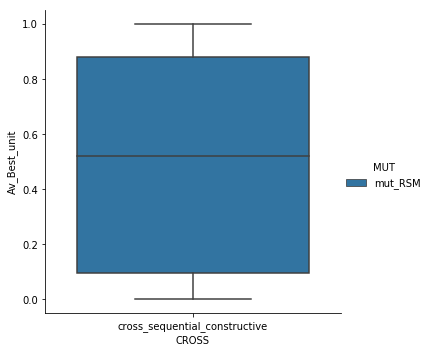

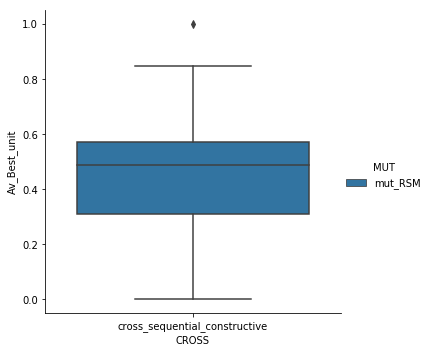

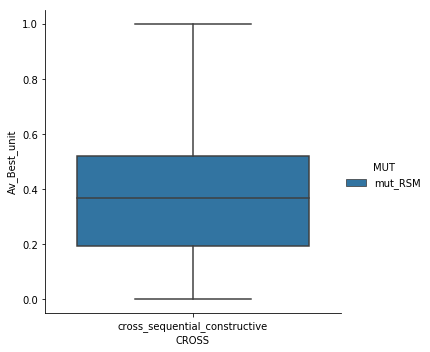

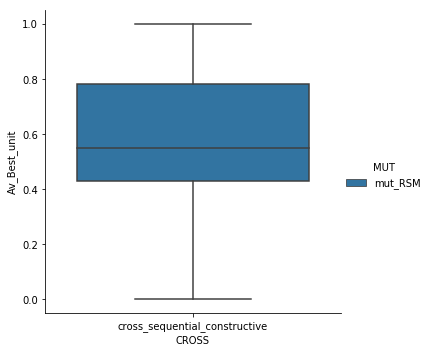

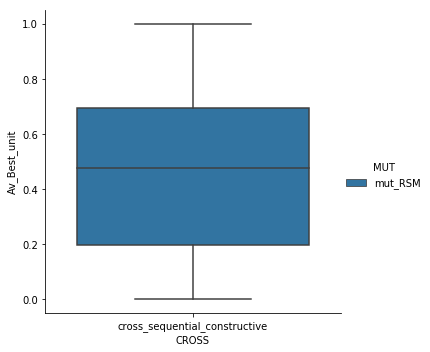

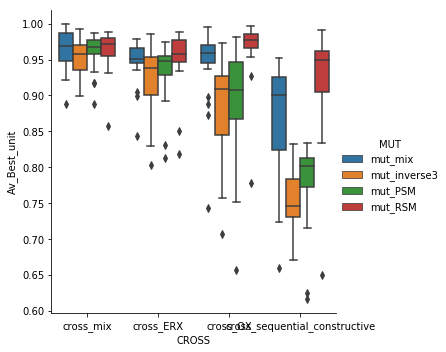

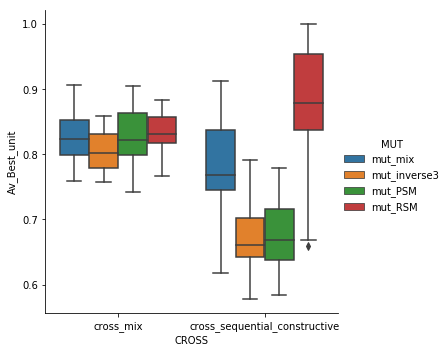

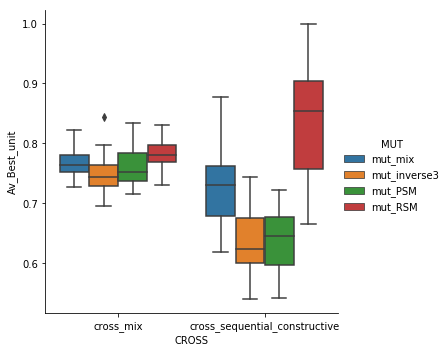

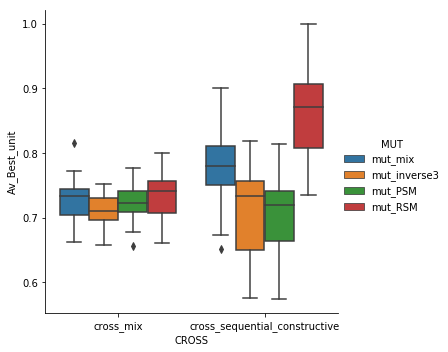

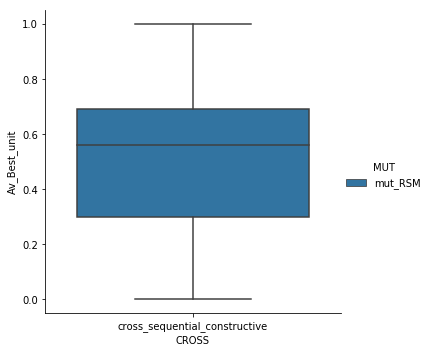

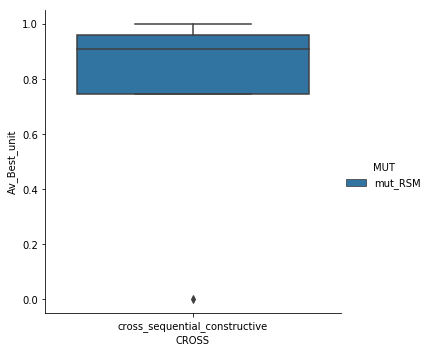

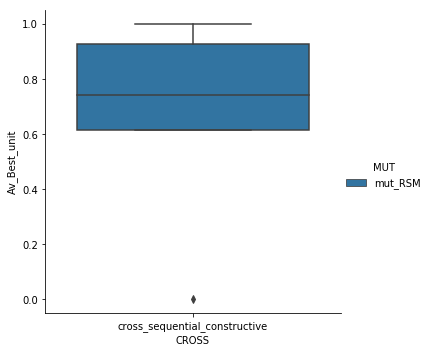

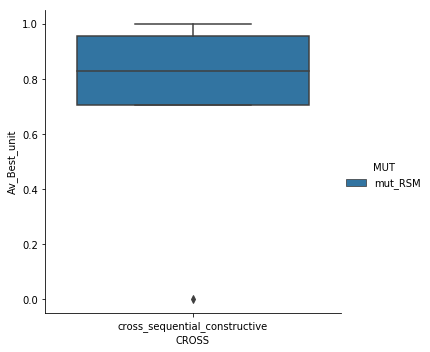

In [8]:
for key in tuning_dict.keys():
    sns.catplot(x="CROSS", y="Av_Best_unit",hue="MUT",kind="box", data=tuning_dict[key]);


In [ ]:
for key in tuning_dict.keys():
    sns.jointplot(x="PR_CROSS", y="Av_Best_unit",data=tuning_dict[key]);


# Pr_Cross/Mut for best Cross,Mut

In [ ]:
for key in tuning_dict.keys():
    sns.jointplot(x="PR_CROSS", y="Av_Best_unit",data=best_dict[key]);

In [ ]:
for key in tuning_dict.keys():
    sns.jointplot(x="PR_MUT", y="Av_Best_unit",data=best_dict[key]);

# PR_CROSS finetune results

# Coarse  %_Cross in [0.1,1]

In [11]:
coarse_dict=process_tuning_tables(tuning_folder,"finetune_")
coarse_table=stack_datasets_tables(coarse_dict)

# Plotting 


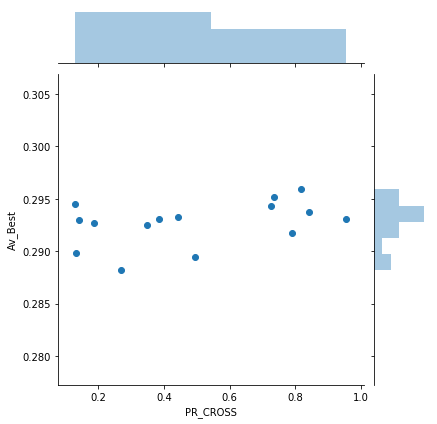

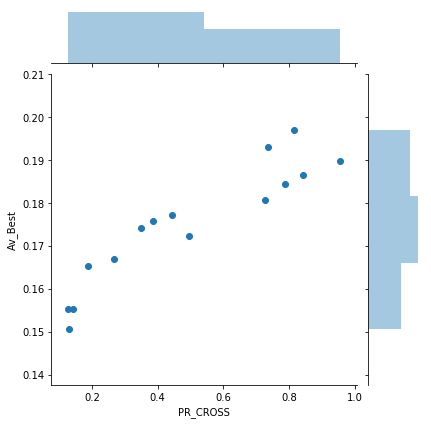

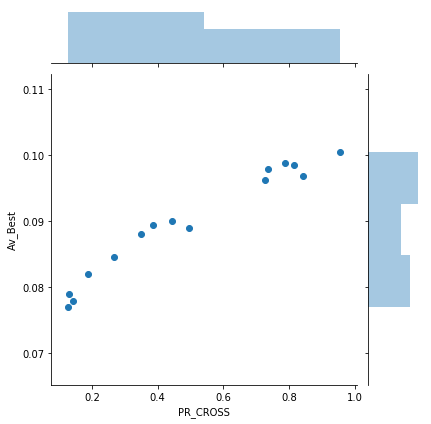

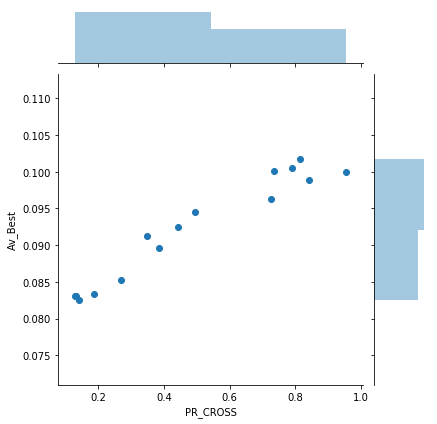

In [8]:
for key in coarse_dict.keys():
    sns.jointplot(x="PR_CROSS", y="Av_Best",data=coarse_dict[key]);

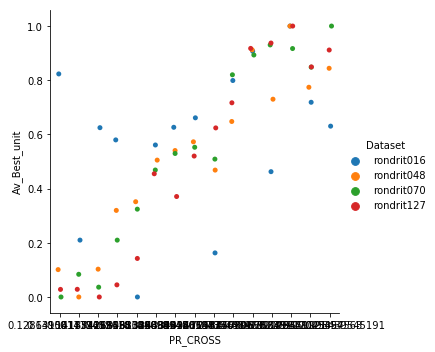

In [14]:
sns.catplot(x="PR_CROSS", y="Av_Best_unit",hue="Dataset", data=coarse_table);

# Fine-grained %_Cross in [0.8,1]

In [13]:
finegrained_dict=process_tuning_tables(tuning_folder,"PR_CROSS_")
finegrained_table=stack_datasets_tables(finegrained_dict)

# Plotting

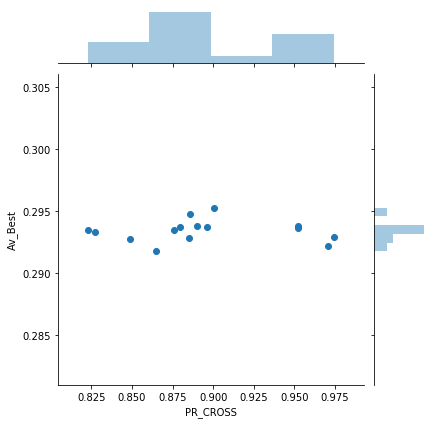

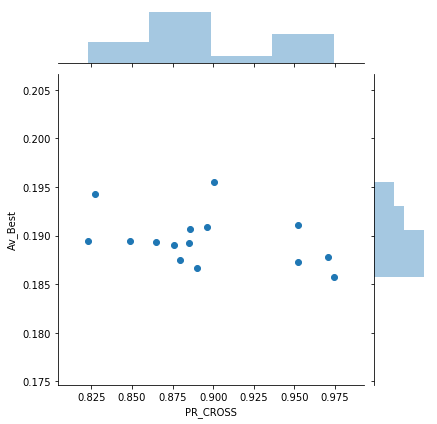

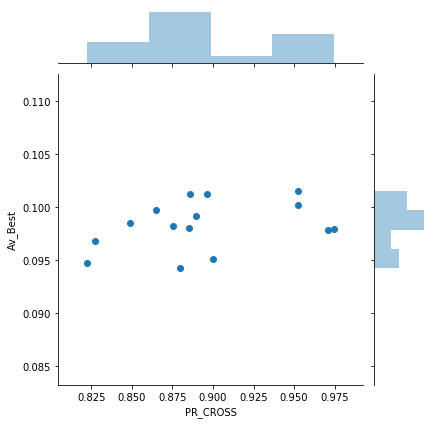

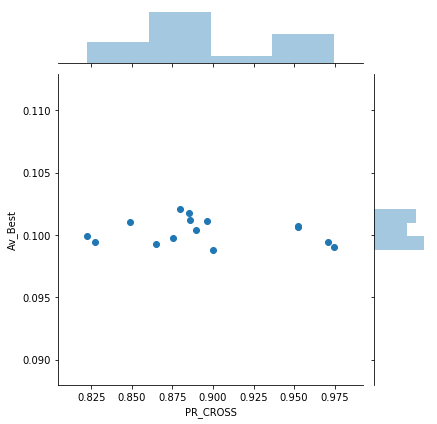

In [17]:
for key in finegrained_dict.keys():
    sns.jointplot(x="PR_CROSS", y="Av_Best",data=finegrained_dict[key]);

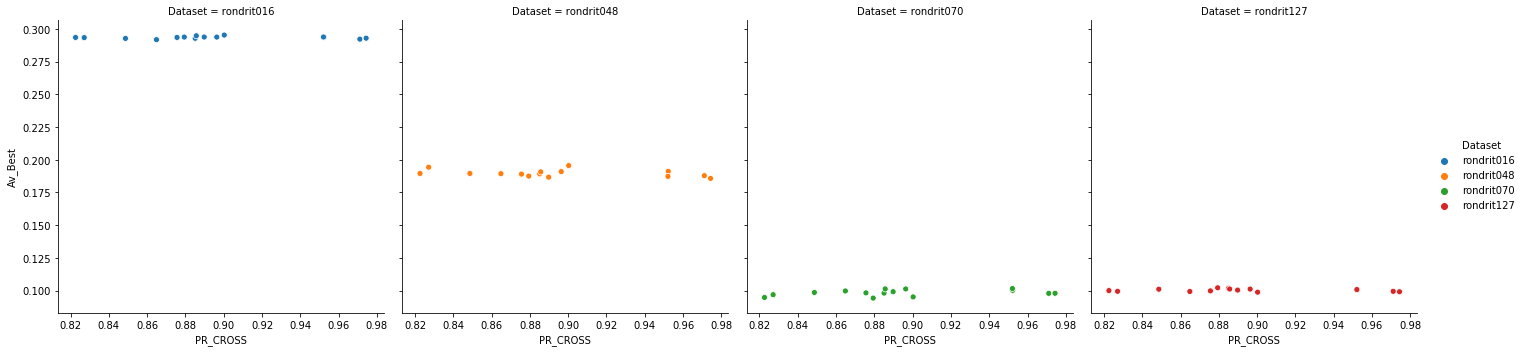

In [23]:
sns.relplot(x="PR_CROSS", y="Av_Best", hue="Dataset",
            col="Dataset", data=finegrained_table);


In [ ]:
sns.catplot(x="PR_CROSS", y="Av_Best_unit", jitter=False, data=test_def_table);

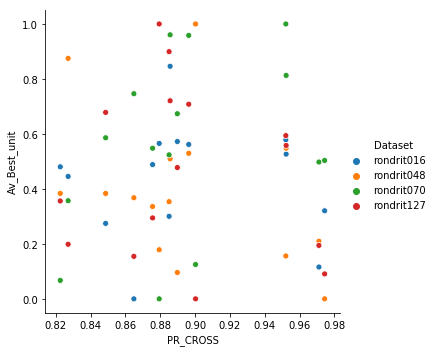

In [25]:
sns.relplot(x="PR_CROSS", y="Av_Best_unit", hue="Dataset", data=finegrained_table);


# Results Scalability

In [3]:
scal_dict=process_tuning_tables(tuning_folder,"scal_")
scal_table=stack_datasets_tables(scal_dict)

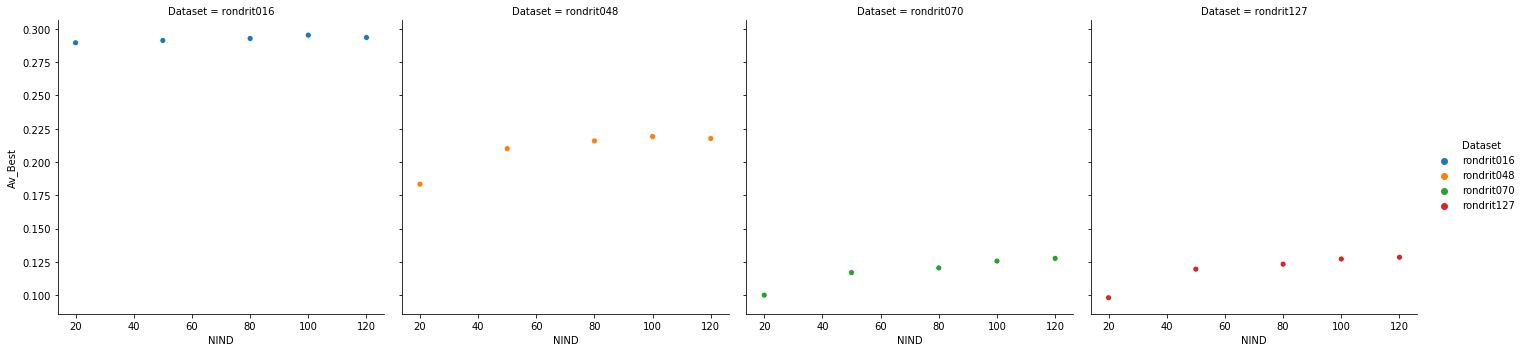

In [6]:
sns.relplot(x="NIND", y="Av_Best", hue="Dataset",
            col="Dataset", data=scal_table);


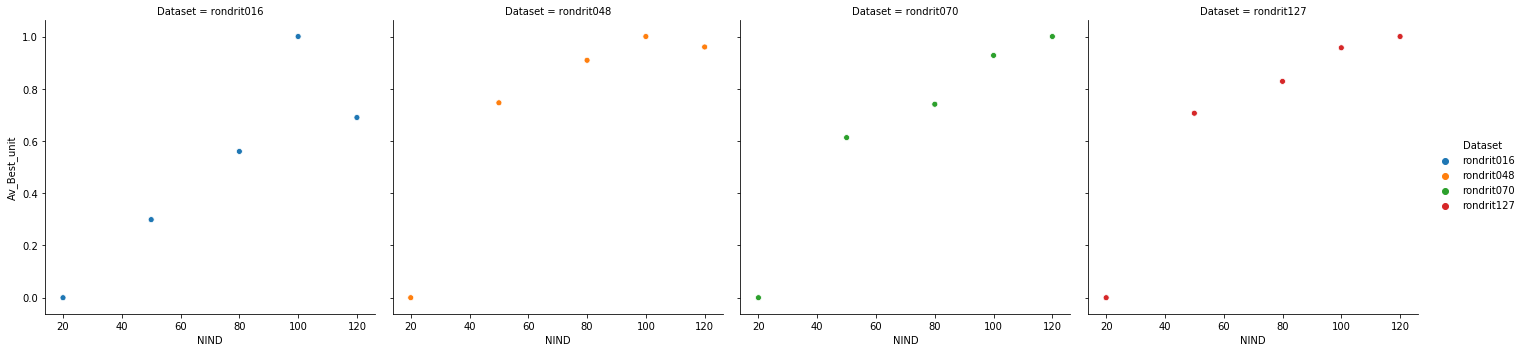

In [9]:
sns.relplot(x="NIND", y="Av_Best_unit", hue="Dataset",col="Dataset" ,data=scal_table);
